# Machine Learning Module - Unsupervised Learning

## Business Context

* A key challenge for Mobile App businesses is to analyze the trend in the market to increase their sales/usage.
*We have access to the user's demographic characteristics, geo-location, and mobile device properties. This grouping can be done by applying different criteria like user’s data, their age group, phone brand compatibility and so on. 
*The machine learning clustering algorithms can provide an analytical method to cluster user segments with similar interests/habits.This will help App/mobile providers better understand and interact with their subscribers.

## Project Objective
We will be clustering the users into groups by selected features that significantly distinguish different brands from each other and understand which factors are responsible for making the clusters

## Data Description

* events.csv - Event data has an event id, location detail (lat/long), and timestamp, when the user is using an app on his device

* gender_age.csv - Details of users age & gender
 
* phone_device.csv - Device ids, brand, and models name. Here the brands names are in Chinese, you can convert it to english using google for better understanding but we will not do it here.

Few important conversions are as listed below:

* 三星 samsung

* 天语 Ktouch

* 海信 hisense

* 联想 lenovo

* 爱派尔 ipair

* 一加 oneplus

* 诺基亚 nokia

* 华硕 asus

* 夏新 panosonic

* 锤子 hammer

### 1. Load the required libraries and read the dataset.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
events= pd.read_csv('/content/gdrive/My Drive/events.csv',encoding='utf-8')

In [ ]:
Age= pd.read_csv('/content/gdrive/My Drive/gender_age.csv',encoding='utf-8')

In [ ]:
phone_brand= pd.read_csv('/content/gdrive/My Drive/phone_device.csv',encoding='utf-8')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [ ]:
## lets check first few samples
events.head(3)

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70


In [ ]:
## lets check the shape of the dataset
events.shape

(3252950, 5)

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  int64  
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 124.1+ MB


In [ ]:
Age.head(3)


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38


In [ ]:
Age.shape

(74645, 4)

In [ ]:
Age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [ ]:
phone_brand.head(3)

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4


In [ ]:
phone_brand.shape

(187245, 3)

In [ ]:
phone_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187245 entries, 0 to 187244
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   device_id     187245 non-null  int64 
 1   phone_brand   187245 non-null  object
 2   device_model  187245 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


Here in Phone Brand data, phone brand & model name is in chinease/different language. We can google it to convert in engish or use any translation API to learn performing language translation. If you are doing manually through google. For simplicity, we will not do anything here for our use case. We will use it as given. 

Few important conversion are as listed below-

三星 samsung

天语 Ktouch

海信 hisense

联想 lenovo

爱派尔 ipair

一加 oneplus

诺基亚 nokia

华硕 asus

夏新 panosonic

锤子 hammer

### Exploratory Data Analysis (EDA)

Data preparation is the process of cleaning and transforming raw data before building the models
You should always explore all the data points and try building your initial hypothesis to see if that factor/variable can help you in solving your main problem statement/your goal

Here we analyze the data with the following steps:
1. Check if there are any duplicate records in the dataset? If any drop them.
2. Merge the data into a single dataframe
3. Check if there is any missing data and handle the same accordingly.
4. Perform data visualization on the dataset to gain some basic insights about the data in hand.
5. Study summary statistics and mention your findings
6. Convert string features (phone_brand, device_model, etc.) into categories and make them numerical.
7. Standardize the data to bring relevant features into a scale
8. Drop irrelevant columns like 'timestamp','event_id','device_id' etc from the dataset.


### 3. Check if there are any duplicate records in the dataset? If any drop them

In [ ]:
#check duplicates in device id & clean it
phone_devices_unique=np.unique(phone_brand['device_id'].values)
print("Number of Unique Phone Device: ",len(phone_devices_unique))
print("Total Number of Devices in Phone Data: ",phone_brand.shape[0])
print("Number of Duplicate Devices: ",phone_brand.shape[0]-len(phone_devices_unique))

Number of Unique Phone Device:  186716
Total Number of Devices in Phone Data:  187245
Number of Duplicate Devices:  529


In [ ]:
#remove duplicates
phone_brand = phone_brand.drop_duplicates('device_id', keep='first')
phone_brand.shape[0]

186716

### 4. Merge the data together into a single dataframe

In [ ]:
#Merge all data together. We can do it all together but better do one by one and learn new dimensions of data
labelled_data = (events.merge(phone_brand, how='left', on='device_id')
                            .merge(Age, how='left', on='device_id')
                            )

In [ ]:
# Check new data frame look
labelled_data.head(2)

,event_id,device_id,timestamp,longitude,latitude,phone_brand,device_model,gender,age,group
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,小米,红米note,M,46.0,M39+
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,三星,Galaxy Grand Prime,NaN,NaN,NaN


In [ ]:
# let's analyze timestamp data
event_time=labelled_data['timestamp'].values
print("Event Start: ",np.min(event_time))
print("Event End: ",np.max(event_time))

Event Start:  2016-04-30 23:52:24
Event End:  2016-05-08 00:00:08


*The Events Data provided is for a period of 7 Days Starting from 30th April 2016 mid-night to starting of 8th May 2016

In [ ]:
labelled_data.shape

(3252950, 10)

### 5. Check for missing values in each column of the dataset? If it exists, handle them accordingly.

In [ ]:
labelled_data.isna().sum()

event_id              0
device_id             0
timestamp             0
longitude             0
latitude              0
phone_brand       92533
device_model      92533
gender          2037355
age             2037355
group           2037355
dtype: int64

In [ ]:
percent_missing = labelled_data.isnull().sum() * 100 / len(labelled_data)
missing_value_df = pd.DataFrame({'column_name': labelled_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
event_id,event_id,0.000000
device_id,device_id,0.000000
timestamp,timestamp,0.000000
longitude,longitude,0.000000
latitude,latitude,0.000000
phone_brand,phone_brand,2.844587
device_model,device_model,2.844587
gender,gender,62.630996
age,age,62.630996
group,group,62.630996


### 6. Check the statistical summary for the numerical and categorical columns and write your findings.

Since we see more than 60% of the data has null values we drop these rows, since these are one of the vital features, we wouldn't want to handle the missing values since it might affect the final prediction.

In [ ]:
df = labelled_data.dropna()
df.shape

(1215595, 10)

* In our dataset, we have both numerical and categorical variables. We check for summary statistics of all the variables

1. For numerical variables, use .describe()
2. For categorical variables, use .describe(include=object) 

In [ ]:
df.describe()

,event_id,device_id,longitude,latitude,age
count,1.215595e+06,1.215595e+06,1.215595e+06,1.215595e+06,1.215595e+06
mean,1.626676e+06,-3.115914e+16,7.839399e+01,2.182756e+01,3.350031e+01
std,9.396637e+05,5.322373e+18,5.381238e+01,1.564825e+01,9.745486e+00
min,1.000000e+00,-9.222957e+18,-1.800000e+02,-3.380000e+01,1.100000e+01
25%,8.123210e+05,-4.672948e+18,0.000000e+00,0.000000e+00,2.700000e+01
50%,1.627312e+06,-1.188460e+17,1.127500e+02,2.857000e+01,3.100000e+01
75%,2.440382e+06,4.631837e+18,1.171700e+02,3.401000e+01,3.900000e+01
max,3.252948e+06,9.220915e+18,1.511800e+02,5.364000e+01,8.900000e+01


### 7. Perform the data visualization on the dataset to gain some basic insights about the data.

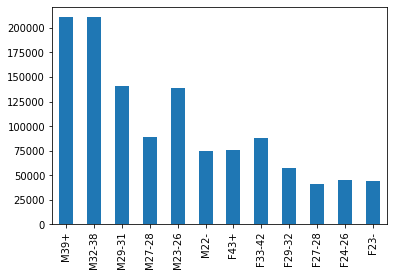

In [ ]:
df.group.value_counts().sort_index(ascending=False).plot(kind='bar')

* Male gender age group is more than Female gender age group

* Lets explore proportion of male & female in data set

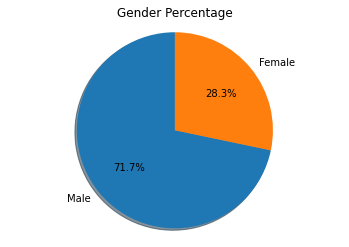

In [ ]:
gender_dict = df['gender'].value_counts()
gender_labels=['Male','Female']
male_percentage=(gender_dict['M']*100)//df.shape[0]
female_percentage=(gender_dict['F']*100)//df.shape[0]
sizes=[male_percentage,female_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=gender_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Gender Percentage')
plt.show()

*Gender representATION Is not Balanced. 2/3rd are Males

* Lets check there age distribution

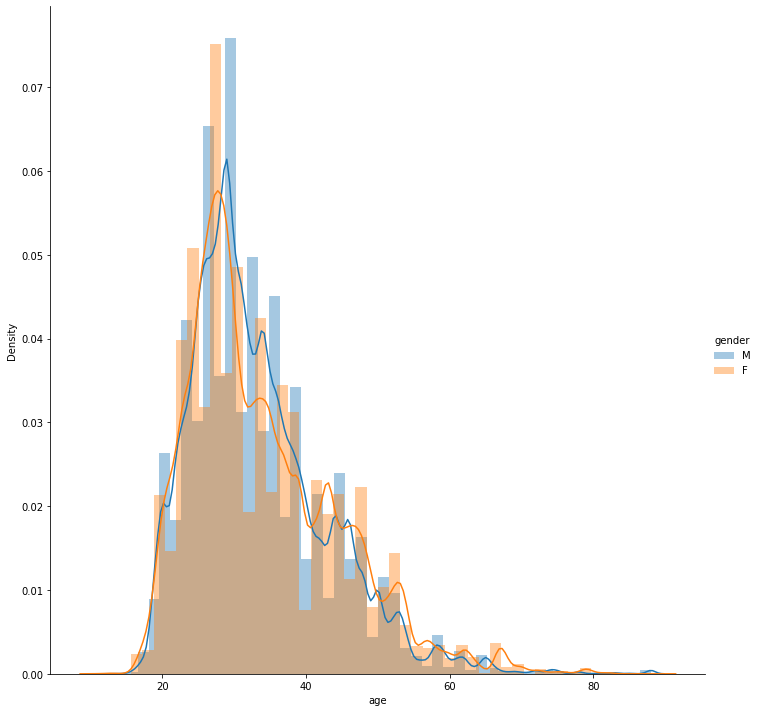

In [ ]:
sns.FacetGrid(df, hue="gender", size=10).map(sns.distplot, "age").add_legend();
plt.show()

* Mostly overlap in the Number of Male and Female in age group below 46/47 but number of female are slightly more than Male in the age group above 46

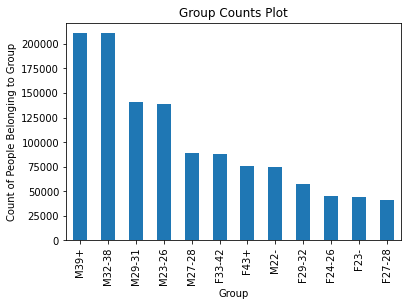

In [ ]:
#see distribution of gender & age(Group) column again
plt.title('Group Counts Plot')
plt.xlabel('Group')
plt.ylabel('Count of People Belonging to Group')
df['group'].value_counts().plot.bar()
plt.show()

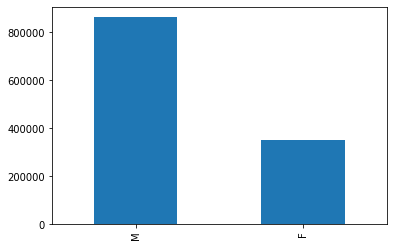

In [ ]:
df.gender.value_counts().plot(kind='bar')
#Expected as per original proportion. Good to go...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215595 entries, 0 to 3252947
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   event_id      1215595 non-null  int64  
 1   device_id     1215595 non-null  int64  
 2   timestamp     1215595 non-null  object 
 3   longitude     1215595 non-null  float64
 4   latitude      1215595 non-null  float64
 5   phone_brand   1215595 non-null  object 
 6   device_model  1215595 non-null  object 
 7   gender        1215595 non-null  object 
 8   age           1215595 non-null  float64
 9   group         1215595 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 102.0+ MB


### 8. Encode the categorical variables in the dataset.

In [ ]:
#lets convert the category data as numeric encoder
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
#dff = df.copy()
df['phone_brand_Cat'] = labelencoder.fit_transform(df['phone_brand'])
df['device_model_Cat'] = labelencoder.fit_transform(df['device_model'])

In [ ]:

df = pd.get_dummies(df, columns=["gender"], prefix=["Type_is"] )

df.head(2)

,event_id,device_id,timestamp,longitude,latitude,phone_brand,device_model,age,group,phone_brand_Cat,device_model_Cat,Type_is_F,Type_is_M
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,小米,红米note,46.0,M39+,34,864,0,1
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,魅族,MX4 Pro,47.0,M39+,87,419,0,1


### 9. Drop irrelevant columns like 'timestamp','event_id','device_id' etc from the dataset.

In [ ]:
#Let's drop original identity data as that will not help in our analysis
dff= df.drop(['group','phone_brand','device_model','timestamp','event_id','device_id'],axis=1)

In [ ]:
dff.head(3)

,longitude,latitude,age,phone_brand_Cat,device_model_Cat,Type_is_F,Type_is_M
0,121.38,31.24,46.0,34,864,0,1
2,106.60,29.70,47.0,87,419,0,1
3,104.27,23.28,30.0,8,744,0,1


### 10. Standardize the data, so that the values are within a particular range.

Feature scaling is a technique to standardize the independent features present in the data in a fixed range. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

The two most discuss scaling methods are normalization and standardization.

- Normalization: It should be used if there are any predefined assumptions of the model. In this approach, the data is scaled to a fixed range - usually 0 to 1
- Standardization: It is used when we are dealing with multiple variables together. In this technique, the features will be rescaled so that they’ll have the properties of a standard normal distribution with (mean = 0 and sd = 1)

In [ ]:
## Tranforming the data using minmax scaling approach so that the values range will be 1.

mm = MinMaxScaler()

dff.iloc[:,:] = mm.fit_transform(dff.iloc[:,:])
dff.head()

,longitude,latitude,age,phone_brand_Cat,device_model_Cat,Type_is_F,Type_is_M
0,0.910019,0.743824,0.448718,0.386364,0.934054,0.0,1.0
2,0.865390,0.726212,0.461538,0.988636,0.452973,0.0,1.0
3,0.858355,0.652790,0.243590,0.090909,0.804324,0.0,1.0
4,0.893411,0.714318,0.217949,0.909091,0.888649,1.0,0.0
5,0.543511,0.386551,0.102564,0.238636,0.457297,0.0,1.0


### 11. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. 

In [ ]:
## step1: Calculate the covariance matrix.
cov_matrix = np.cov(dff.T)
cov_matrix

array([[ 2.64019642e-02,  2.76096392e-02,  7.40951003e-05,
        -3.93688846e-03,  3.90910601e-03, -4.10418649e-03,
         4.10418649e-03],
       [ 2.76096392e-02,  3.20266496e-02,  5.44614019e-04,
        -4.44469904e-03,  3.85907152e-03, -2.92907801e-03,
         2.92907801e-03],
       [ 7.40951003e-05,  5.44614019e-04,  1.56105340e-02,
        -4.15056352e-05, -4.12122708e-04,  1.93748638e-03,
        -1.93748638e-03],
       [-3.93688846e-03, -4.44469904e-03, -4.15056352e-05,
         7.76754964e-02,  1.01662320e-02, -6.36442868e-03,
         6.36442868e-03],
       [ 3.90910601e-03,  3.85907152e-03, -4.12122708e-04,
         1.01662320e-02,  8.47765419e-02, -4.98452906e-03,
         4.98452906e-03],
       [-4.10418649e-03, -2.92907801e-03,  1.93748638e-03,
        -6.36442868e-03, -4.98452906e-03,  2.05473977e-01,
        -2.05473977e-01],
       [ 4.10418649e-03,  2.92907801e-03, -1.93748638e-03,
         6.36442868e-03,  4.98452906e-03, -2.05473977e-01,
         2.0547397

In [ ]:
## step2: Calculate the eigen values and eigen vectors.
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

eigein vals: 
 [4.11514968e-01 9.16425442e-02 7.41779423e-02 5.30663697e-02
 1.55885534e-02 1.44876255e-03 1.95196309e-34]


eigein vectors 
 [[ 1.58667894e-02 -1.96167625e-02 -2.83472646e-01  6.06104798e-01
   2.46291216e-02 -7.42318710e-01  1.60214600e-17]
 [ 1.19624652e-02 -1.77593276e-02 -3.11434056e-01  6.73824553e-01
  -4.09827739e-03  6.69696955e-01 -2.97930725e-17]
 [-6.92212202e-03  3.37364598e-03 -1.98151179e-04  1.49953892e-02
  -9.99635562e-01 -2.10842186e-02  1.53857738e-16]
 [ 2.72851738e-02 -5.65770180e-01  7.53755350e-01  3.33173948e-01
   2.75387066e-03 -1.76962153e-04 -1.72999818e-17]
 [ 2.27448216e-02 -8.23398757e-01 -5.04484056e-01 -2.58718305e-01
  -6.78962266e-03  3.42589652e-03 -2.37184001e-17]
 [-7.06503864e-01 -2.45662129e-02  6.15706226e-04  1.47061810e-02
   5.08282429e-03 -2.51091873e-03  7.07106781e-01]
 [ 7.06503864e-01  2.45662129e-02 -6.15706226e-04 -1.47061810e-02
  -5.08282429e-03  2.51091873e-03  7.07106781e-01]]


In [ ]:
## step3: Scree plot.
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [63.56040940149861, 14.1546190923742, 11.457129739756136, 8.19634872381557, 2.407724898362223, 0.2237681441932825, 3.0148981892183346e-32]
Cummulative Variance Explained:  [ 63.5604094   77.71502849  89.17215823  97.36850696  99.77623186
 100.         100.        ]


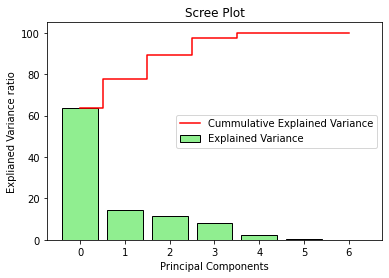

In [ ]:
## Scree plot.
plt.bar(range(7),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(7),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explianed Variance ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

- We can observe from the above scree plot the first 3 principal components are explaining the about 90-95% of the variation, So we can choose optimal number of principal components as 3.

### 12. Apply K-means clustering and segment the data (You may use original data or PCA transformed data)
 a. Find the optimal K Value using elbow plot for KMeans clustering.

 b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.
 
 c. Compute silhoutte score for evaluating the quality of the Kmeans clustering technique.

Centroid-based clustering algorithms cluster the data into non-hierarchical clusters. Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm

### Taking a sample of data for building the clustering model to avoid compuation issues

In [ ]:
## Using the dimensions obtainted from the PCA to apply clustering.(i.e, 3)
pca = PCA(n_components=3)

pca_df = pd.DataFrame(pca.fit_transform(dff),columns=['PC1','PC2','PC3'])
pca_df.head()

,PC1,PC2,PC3
0,-0.418477,-0.248723,-0.159310
1,-0.422960,-0.192118,0.555487
2,-0.406976,0.027194,-0.273527
3,0.980320,-0.556141,0.272778
4,-0.395909,0.239784,0.185086


#### Kmeans clustering (using the PCA tranformed data)

In [ ]:
## finding optimal K value by KMeans clustering using Elbow plot.
cluster_errors = []
cluster_range = range(2,6)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [ ]:
## creataing a dataframe of number of clusters and cluster errors.
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

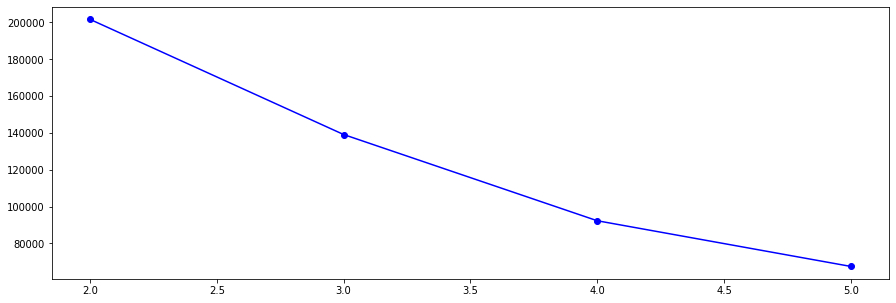

In [ ]:
## Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

- From the above elbow plot we can see at the cluster K=4, the inertia significantly decreases . Hence we can select our optimal clusters as K=4.

In [ ]:
## Applying KMeans clustering for the optimal number of clusters obtained above.
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=100)

In [ ]:
## creating a dataframe of the labels.
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [ ]:
## joining the label dataframe to the pca_df dataframe.
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,Label
0,-0.418477,-0.248723,-0.159310,2
1,-0.422960,-0.192118,0.555487,3
2,-0.406976,0.027194,-0.273527,2
3,0.980320,-0.556141,0.272778,1
4,-0.395909,0.239784,0.185086,0


In [ ]:
kmeans_df['Label'].value_counts()

2    391504
1    351292
0    335277
3    137522
Name: Label, dtype: int64

In [ ]:
pca_df_1 = pca_df.sample(n=50000)
## reseting the index
pca_df_1.reset_index(inplace=True,drop=True)

## finding optimal clusters through silhoutte score
from sklearn.metrics import silhouette_score

for i in range(2,7):
  kmeans = KMeans(i,random_state=100)
  kmeans.fit(pca_df_1)
  labels = kmeans.predict(pca_df_1)
  print(i,silhouette_score(pca_df_1,labels))

2 0.6734111665713742
3 0.5263538302859997
4 0.6055916611088723
5 0.5480644083291009
6 0.57342937744279


We build our models using the silhouette score method. The silhouette is a method of interpretation and validation of consistency within clusters of data.
We do not know how many clusters give the most useful results. So, we create the clusters varying K, from 3 to 6 and then decide the optimum number of clusters (K) with the help of the silhouette score

* The optimum value for K is associated with the high value of the 'silhouette score'. From the above output it can be seen that, for K = 2, and K=4 the silhouette score is highest. Thus, we will try to build the clusters with K = 2 

### 13. Apply Agglomerative clustering and segement the data.  (You may use original data or PCA transformed data)
- a. Find the optimal K Value using dendrogram for Agglomerative clustering.
- b. Build a Agglomerative clustering model using the obtained optimal K value from observed from dendrogram.
- c. Compute silhoutte score for evaluating the quality of the Agglomerative clustering technique.

(Hint: Take a sample of the dataset for agglomerative clustering)

#### Agglomerative clustering (using original data)

In [ ]:
## Let us use the dfc2 for this (a copy of the cleaned dataset after encoding and data standardization)

In [ ]:
## Since dataset is huge plotting dendrogram might be time consuming.
## Let us take a sample of the dataset. (since the dataset is huge around 2 lakh rows, let take a sample)

In [ ]:
dff.head()

,longitude,latitude,age,phone_brand_Cat,device_model_Cat,Type_is_F,Type_is_M
0,0.910019,0.743824,0.448718,0.386364,0.934054,0.0,1.0
2,0.865390,0.726212,0.461538,0.988636,0.452973,0.0,1.0
3,0.858355,0.652790,0.243590,0.090909,0.804324,0.0,1.0
4,0.893411,0.714318,0.217949,0.909091,0.888649,1.0,0.0
5,0.543511,0.386551,0.102564,0.238636,0.457297,0.0,1.0


In [ ]:
## Taking a sample of 50K rows from the dff dataframe using random sampling technique provided by pandas 
 
dff_2 = dff.sample(n=30000)

## reseting the index
dff_2.reset_index(inplace=True,drop=True)

In [ ]:
dff_2.head(4)

,longitude,latitude,age,phone_brand_Cat,device_model_Cat,Type_is_F,Type_is_M
0,0.543511,0.386551,0.205128,0.159091,0.969730,0.0,1.0
1,0.907965,0.745197,0.384615,0.909091,0.887568,1.0,0.0
2,0.907784,0.740050,0.115385,0.113636,0.337297,0.0,1.0
3,0.878646,0.786940,0.474359,0.090909,0.744865,1.0,0.0


#### Dendrogram

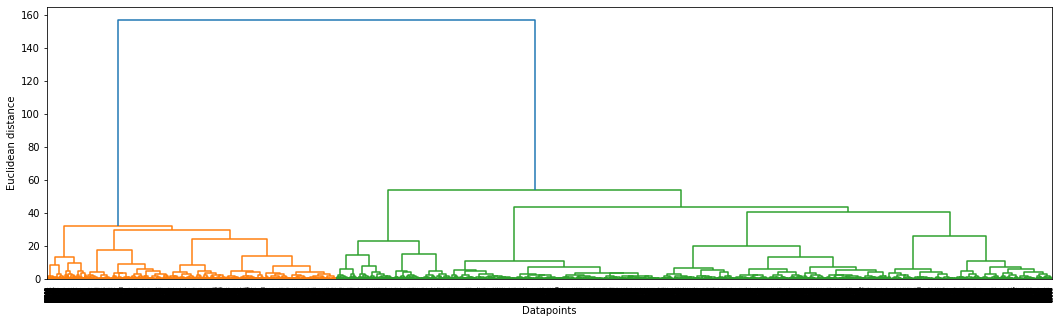

In [ ]:
plt.figure(figsize=[18,5])
merg = linkage(dff_2, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

- We look for the largest distance that we can vertically observe without crossing any horizontal line.
- We can observe from the above dendrogram that we can choose optimal clusters has 2.

In [ ]:
## Building hierarchical clustering model using the optimal clusters as 2
hie_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(dff_2)

In [ ]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,1


In [ ]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc1)

df_hier = dff_2.join(df_label1)
df_hier.head()

,longitude,latitude,age,phone_brand_Cat,device_model_Cat,Type_is_F,Type_is_M,Labels
0,0.543511,0.386551,0.205128,0.159091,0.969730,0.0,1.0,0
1,0.907965,0.745197,0.384615,0.909091,0.887568,1.0,0.0,1
2,0.907784,0.740050,0.115385,0.113636,0.337297,0.0,1.0,0
3,0.878646,0.786940,0.474359,0.090909,0.744865,1.0,0.0,1
4,0.888822,0.739593,0.256410,0.090909,0.742703,1.0,0.0,1


In [ ]:
for i in range(2,7):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(dff_2)
    labels = hier.fit_predict(dff_2)
    print(i,silhouette_score(dff_2,labels))

2 0.6000955296699574
3 0.459806875620219
4 0.389643267204589
5 0.4495907099999998
6 0.3974970054959757


- We can observe from the silhouette scores for the agglomerative clustering with 2 clusters is higher compared to the rest. 

### 14. Perform cluster analysis by doing bivariate analysis between cluster label and different features and write your conclusion on the results.

In [ ]:
df_hier['Labels'].unique()

array([0, 1])

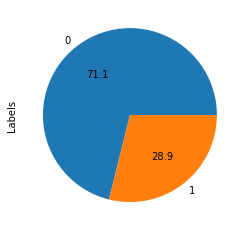

In [ ]:
df_hier['Labels'].value_counts().plot(kind='pie',autopct='%0.1f')
plt.show()

- We can observe that the clusters formed are imbalanced. There are more number of records assigned to cluster 0 than that of cluster 1.

In [ ]:
df.head()

,event_id,device_id,timestamp,longitude,latitude,phone_brand,device_model,age,group,phone_brand_Cat,device_model_Cat,Type_is_F,Type_is_M
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,小米,红米note,46.0,M39+,34,864,0,1
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,魅族,MX4 Pro,47.0,M39+,87,419,0,1
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,vivo,Y27,30.0,M29-31,8,744,0,1
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,酷派,大神F2,28.0,F27-28,80,822,1,0
5,6,1476664663289716375,2016-05-01 00:27:21,0.00,0.00,华为,Mate 7,19.0,M22-,21,423,0,1


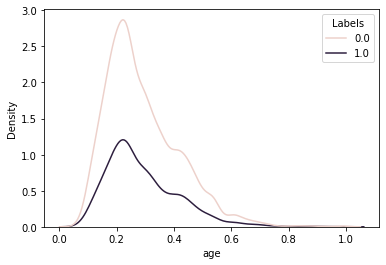

In [ ]:
## Lets check the age distribution of the different clusters.
sns.kdeplot(dff['age'],hue='Labels',data=df_hier)
plt.show()

- The distribution of the age for different clusters is almost same, since there are more number of observations assigned to the cluster 0.

- In this project, we have attempted to implement and apply PCA on the Mobile User Demographics dataset and we selected 3 PCA compoments, which explains 90-95% of the variance in the data.
- Also, we have used the PCA dimensions to cluster the data and segment the similar data in to clusters using KMeans clustering.
- We have used Kmeans clustering algorithm to cluster the data, First we chose the optimal K value with the help of elbow plot used obtained K value from elbow plot to build a kmeans clustering model.
- We have computed the silhoutte score for the different K values and evaluated the goodness of the clustering technique used.
- We took the sample of the data and did agglomerative clustering using the original data and plotted dendrogram and analyzed the optimal number of classes and built a agglomerative clustering model using the obtained K value and evaluated the model using silhoutte score.
- In this dataset, we had less number of features, further we can ask the company to collect some more demographic information about the users.
- By collecting more features, the customer segmentation/clustering of similar customers into groups will be more effective and we can infer more out of the clusters formed and will able to give suggestions to the company based on the analysis that will help the business to target the right customers and stand in the market for longer and make high revenue. 

### Happy Learning :)